<a href="https://colab.research.google.com/github/WildanBudiawanZ/pembelajaran-mesin/blob/main/Pertemuan_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semi-Supervised Learning

## Self-Training Classifier

In [ ]:
# Data manipulation
import pandas as pd

# Visualization
import plotly.express as px

# Sklearn
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.svm import SVC # for Support Vector Classification baseline model
from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.metrics import classification_report # for model evaluation metrics

In [ ]:
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/marketing_campaign.csv', 
                 encoding='utf-8', delimiter=';',
                 usecols=['ID', 'Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntMeatProducts']
                )
df_backup = df
df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts
0,5524,1957,Single,58138.0,0,0,635,546
1,2174,1954,Single,46344.0,1,1,11,6
2,4141,1965,Together,71613.0,0,0,426,127
3,6182,1984,Together,26646.0,1,0,11,20
4,5324,1981,Married,58293.0,1,0,173,118
...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,182
2236,4001,1946,Together,64014.0,2,1,406,30
2237,7270,1981,Divorced,56981.0,0,0,908,217
2238,8235,1956,Together,69245.0,0,1,428,214


In [ ]:
# Create a flag to denote whether the person has any dependants at home (either kids or teens)
df['Dependents_Flag']=df.apply(lambda x: 1 if x['Kidhome']+x['Teenhome']>0 else 0, axis=1)

# Print dataframe
df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts,Dependents_Flag
0,5524,1957,Single,58138.0,0,0,635,546,0
1,2174,1954,Single,46344.0,1,1,11,6,1
2,4141,1965,Together,71613.0,0,0,426,127,0
3,6182,1984,Together,26646.0,1,0,11,20,1
4,5324,1981,Married,58293.0,1,0,173,118,1
...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,182,1
2236,4001,1946,Together,64014.0,2,1,406,30,1
2237,7270,1981,Divorced,56981.0,0,0,908,217,0
2238,8235,1956,Together,69245.0,0,1,428,214,1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)
print('Size of train dataframe: ', df_train.shape[0])
print('Size of test dataframe: ', df_test.shape[0])

Size of train dataframe:  1680
Size of test dataframe:  560


In [ ]:
# Create a flag for label masking
df_train['Random_Mask'] = True
df_train.loc[df_train.sample(frac=0.05, random_state=0).index, 'Random_Mask'] = False

df_train

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts,Dependents_Flag,Random_Mask
2125,2088,1972,Together,84906.0,0,0,997,414,0,True
227,709,1952,Divorced,51537.0,0,1,787,204,1,True
1751,7807,1974,Married,44989.0,0,1,98,106,1,True
958,1523,1973,Married,59041.0,1,1,69,15,1,True
526,4322,1958,Together,77863.0,0,0,881,319,0,True
...,...,...,...,...,...,...,...,...,...,...
1033,5263,1977,Married,31056.0,1,0,5,13,1,True
1731,10304,1959,Married,18690.0,0,0,6,7,0,True
763,7573,1978,Single,31626.0,1,0,39,9,1,True
835,9904,1956,Married,71391.0,0,1,336,274,1,True


In [ ]:
# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df_train['Dependents_Target']=df_train.apply(lambda x: x['Dependents_Flag'] if x['Random_Mask']==False else -1, axis=1)
df_train

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts,Dependents_Flag,Random_Mask,Dependents_Target
2125,2088,1972,Together,84906.0,0,0,997,414,0,True,-1
227,709,1952,Divorced,51537.0,0,1,787,204,1,True,-1
1751,7807,1974,Married,44989.0,0,1,98,106,1,True,-1
958,1523,1973,Married,59041.0,1,1,69,15,1,True,-1
526,4322,1958,Together,77863.0,0,0,881,319,0,True,-1
...,...,...,...,...,...,...,...,...,...,...,...
1033,5263,1977,Married,31056.0,1,0,5,13,1,True,-1
1731,10304,1959,Married,18690.0,0,0,6,7,0,True,-1
763,7573,1978,Single,31626.0,1,0,39,9,1,True,-1
835,9904,1956,Married,71391.0,0,1,336,274,1,True,-1


In [ ]:
# Show target value distribution
print('Target Value Distribution:')
print(df_train['Dependents_Target'].value_counts())

Target Value Distribution:
-1    1596
 1      58
 0      26
Name: Dependents_Target, dtype: int64


In [ ]:
# Create a scatter plot
fig = px.scatter(df_train, x='MntMeatProducts', y='MntWines', opacity=1, color=df_train['Dependents_Target'].astype(str),
                 color_discrete_sequence=['lightgrey', 'yellow', 'green'],
                )

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white')

# Set figure title
fig.update_layout(title_text="Marketing Campaign Training Data - Labeled vs. Unlabeled")

# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()

In [ ]:
########## Step 1 - Data Prep ########## 
# Select only records with known labels
df_train_labeled=df_train[df_train['Dependents_Target']!=-1]

# Select data for modeling 
X_baseline=df_train_labeled[['MntMeatProducts', 'MntWines']]
y_baseline=df_train_labeled['Dependents_Target'].values

# Put test data into an array
X_test=df_test[['MntMeatProducts', 'MntWines']]
y_test=df_test['Dependents_Flag'].values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = SVC(kernel='rbf', 
            probability=True, 
            C=1.0, # default = 1.0
            gamma='scale', # default = 'scale'
            random_state=0
           )

# Fit the model
clf = model.fit(X_baseline, y_baseline)


########## Step 3 - Model Evaluation ########## 
# Use score method to get accuracy of the model
print('---------- SVC Baseline Model - Evaluation on Test Data ----------')
accuracy_score_B = model.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_B)
# Look at classification report to evaluate the model
print(classification_report(y_test, model.predict(X_test)))

---------- SVC Baseline Model - Evaluation on Test Data ----------
Accuracy Score:  0.8285714285714286
              precision    recall  f1-score   support

           0       0.77      0.54      0.63       154
           1       0.84      0.94      0.89       406

    accuracy                           0.83       560
   macro avg       0.81      0.74      0.76       560
weighted avg       0.82      0.83      0.82       560



Now let’s follow a Semi-Supervised approach with Sklearn’s Self-Training Classifier while using the same SVC model as a base estimator.

In [ ]:
########## Step 1 - Data Prep ########## 
# Select data for modeling - we are including masked (-1) labels this time
X_train=df_train[['MntMeatProducts', 'MntWines']]
y_train=df_train['Dependents_Target'].values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model_svc = SVC(kernel='rbf', 
                probability=True, # Need to enable to be able to use predict_proba
                C=1.0, # default = 1.0
                gamma='scale', # default = 'scale',
                random_state=0
               )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model_svc, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


########## Step 3 - Model Evaluation ########## 
print('')
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
#print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
print('Feature Names: ', clf_ST.feature_names_in_)
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
# Look at classification report to evaluate the model
print(classification_report(y_test, clf_ST.predict(X_test)))

End of iteration 1, added 1432 new labels.
End of iteration 2, added 127 new labels.
End of iteration 3, added 16 new labels.
End of iteration 4, added 3 new labels.

---------- Self Training Model - Summary ----------
Base Estimator:  SVC(probability=True, random_state=0)
Classes:  [0 1]
Transduction Labels:  [0 1 1 ... 1 1 0]
Number of Features:  2
Feature Names:  ['MntMeatProducts' 'MntWines']
Number of Iterations:  5
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8357142857142857
              precision    recall  f1-score   support

           0       0.80      0.54      0.64       154
           1       0.84      0.95      0.89       406

    accuracy                           0.84       560
   macro avg       0.82      0.74      0.77       560
weighted avg       0.83      0.84      0.82       560



## Label Propagation

In [ ]:
# Read in data
df = df_backup

# Create a flag to denote whether the person has any dependants at home (either kids or teens)
df['Dependents_Flag']=df.apply(lambda x: 1 if x['Kidhome']+x['Teenhome']>0 else 0, axis=1)

# Randomly select 15% of observations to keep the label for. The rest of obs turned to be unlabeled
df['Rand_Selection'] = False
df.loc[df.sample(frac=0.15, random_state=42).index, 'Rand_Selection'] = True

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled data
df['Dependents_Target']=df.apply(lambda x: x['Dependents_Flag'] if x['Rand_Selection']==True else -1, axis=1)

# Show target value distribution
print('Target Value Distribution:')
print(df['Dependents_Target'].value_counts())

# Print dataframe
df

Target Value Distribution:
-1    1904
 1     225
 0     111
Name: Dependents_Target, dtype: int64


,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts,Dependents_Flag,Rand_Selection,Dependents_Target
0,5524,1957,Single,58138.0,0,0,635,546,0,False,-1
1,2174,1954,Single,46344.0,1,1,11,6,1,False,-1
2,4141,1965,Together,71613.0,0,0,426,127,0,False,-1
3,6182,1984,Together,26646.0,1,0,11,20,1,False,-1
4,5324,1981,Married,58293.0,1,0,173,118,1,False,-1
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,182,1,False,-1
2236,4001,1946,Together,64014.0,2,1,406,30,1,False,-1
2237,7270,1981,Divorced,56981.0,0,0,908,217,0,True,0
2238,8235,1956,Together,69245.0,0,1,428,214,1,False,-1


Note, we have kept 15% of the actual labels (1’s and 0’s) and masked the remainder 85% (-1’s). Hence, our target contains information on whether the shopper has any dependents (1), does not have any dependents (0), or this information is masked (-1).

We will now attempt to assign a label to those 85% masked observations.

Model Name:  LabelPropagation(kernel='knn', n_jobs=-1, n_neighbors=20)
Classes:  [0 1]
Label Distributions:  [[0.63789402 0.36210598]
 [0.00350445 0.99649555]
 [0.18636543 0.81363457]
 ...
 [1.         0.        ]
 [0.30515962 0.69484038]
 [0.23117501 0.76882499]]
Transduction Label:  [0 1 1 ... 0 1 1]
No. of features:  2
No. of iterations:  76

*************** Evaluation of LP knn model ***************
              precision    recall  f1-score   support

           0       0.77      0.54      0.63       527
           1       0.84      0.94      0.89      1377

    accuracy                           0.83      1904
   macro avg       0.80      0.74      0.76      1904
weighted avg       0.82      0.83      0.82      1904


******************** Confusion Matrix ********************


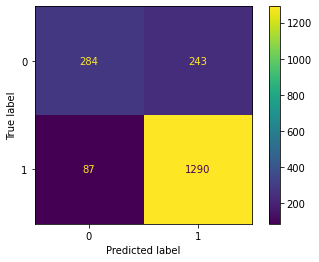

In [ ]:
### Step 1 - Select data
X=df[['MntMeatProducts', 'MntWines']]
y=df['Dependents_Target'].values


### Step 2 - Perform Min-Max scaling
from sklearn.preprocessing import MinMaxScaler # for feature scaling

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

### Step 3 - Configure model parameters 
from sklearn.semi_supervised import LabelPropagation # for assigning labels to unlabeled data
model_LP_knn = LabelPropagation(kernel='knn', # {'knn', 'rbf'} default='rbf'
                              #gamma=70, # default=20, Parameter for rbf kernel.
                              n_neighbors=20, # default=7, Parameter for knn kernel which is a strictly positive integer.
                              max_iter=1000, # default=30, Maximum number of iterations allowed.
                              tol=0.001, # default=1e-3, Convergence tolerance: threshold to consider the system at steady state.
                              n_jobs=-1, # default=None, The number of parallel jobs to run. -1 means using all processors. 
                             )

### Step 4 - Fit the model
LP_knn=model_LP_knn.fit(X_scaled, y)

### Step 5 - exclude observations with known records before evcaluating model performance
df_eval=df[['Dependents_Flag', 'Dependents_Target']].copy() # Copy dataframe with dependents info
df_eval['Predicted_label']=LP_knn.transduction_ # Attach model predictions
df_eval=df_eval[df_eval['Dependents_Target']==-1] # Keep only records containing masked labels

### Step 6 - Print the summary of model results
print("Model Name: ", str(LP_knn))
print("Classes: ", LP_knn.classes_)
print("Label Distributions: ", LP_knn.label_distributions_)
print("Transduction Label: ", LP_knn.transduction_)
print("No. of features: ", LP_knn.n_features_in_)
print("No. of iterations: ", LP_knn.n_iter_)
print('')
print('*************** Evaluation of LP knn model ***************')
print(classification_report(df_eval['Dependents_Flag'], df_eval['Predicted_label']))
print('')
print('******************** Confusion Matrix ********************')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(df_eval['Dependents_Flag'], df_eval['Predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LP_knn.classes_)
disp.plot()

import matplotlib.pyplot as plt # for displaying confusion matrix
plt.show()

As you can see, we have been relatively successful at inferring labels with a model accuracy of 83% (to make the assessment fair, we only used records with masked labels for model performance evaluation). It is a pretty good result, given that we only used labels from 15% of observations. However, we could improve it further by either increasing the number of known labels or exploring additional dimensions for a connected graph.

In [ ]:
import numpy as np # for data manipulation
import plotly.graph_objects as go # for data visualization

# Specify a size of the mesh to be used
mesh_size=10
margin=0

# Create a mesh grid for displaying a threshold plane
x_min, x_max = df['MntMeatProducts'].min() - margin, df['MntMeatProducts'].max() + margin
y_min, y_max = df['MntWines'].min() - margin, df['MntWines'].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Set Z values to 0.5 for the threshold plane
Z = np.ones_like(xx)*0.5


# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['MntMeatProducts'], y=df['MntWines'], z=LP_knn.label_distributions_[:,1], 
                    color=df['Dependents_Flag'].astype('str'),
                    color_discrete_sequence=['yellow', 'green'],
                    opacity=0.8,  
                    hover_data=['Marital_Status', 
                                'MntWines', 'Dependents_Target',
                                'Dependents_Flag',
                               ],
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          title_text='Probability',
                                          tickfont=dict(size=10),
                                          dtick=0.1,
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=3))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='Separator', 
                          colorscale='Gray', opacity=0.5, showscale=False))

fig.show()

## Label Spreading

In [ ]:
# Read in data
df = df_backup

# Create a flag to denote whether the person has any dependants at home (either kids or teens)
df['Dependents_Flag']=df.apply(lambda x: 1 if x['Kidhome']+x['Teenhome']>0 else 0, axis=1)

# Randomly select 2% of observations to keep the label for. The rest of obs will have their labels masked
df['Rand_Selection'] = False
df.loc[df.sample(frac=0.02, random_state=42).index, 'Rand_Selection'] = True

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df['Dependents_Target']=df.apply(lambda x: x['Dependents_Flag'] if x['Rand_Selection']==True else -1, axis=1)

# Show target value distribution
print('Target Value Distribution:')
print(df['Dependents_Target'].value_counts())

# Print dataframe
df

Target Value Distribution:
-1    2195
 1      28
 0      17
Name: Dependents_Target, dtype: int64


,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts,Dependents_Flag,Rand_Selection,Dependents_Target
0,5524,1957,Single,58138.0,0,0,635,546,0,False,-1
1,2174,1954,Single,46344.0,1,1,11,6,1,False,-1
2,4141,1965,Together,71613.0,0,0,426,127,0,False,-1
3,6182,1984,Together,26646.0,1,0,11,20,1,False,-1
4,5324,1981,Married,58293.0,1,0,173,118,1,False,-1
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,182,1,False,-1
2236,4001,1946,Together,64014.0,2,1,406,30,1,False,-1
2237,7270,1981,Divorced,56981.0,0,0,908,217,0,False,-1
2238,8235,1956,Together,69245.0,0,1,428,214,1,False,-1


Note, we have kept 2% of the actual labels (1’s and 0’s) and masked the remainder 98% (-1’s). Hence, our target contains information on whether the shopper has any dependents (1), does not have any dependents (0), or this information is masked (-1).

We are being ambitious here as we aim to assign labels to 2,195 data points by using only 45 known labels.

The features that we use are MntMeatProducts (shopper’s annual spend on meat products) MntWines (shopper’s annual spend on wine). Now, let’s see what the data looks like when we plot it on a graph.

In [ ]:
# Create a scatter plot
fig = px.scatter(df, x='MntMeatProducts', y='MntWines', opacity=1, color=df['Dependents_Target'].astype(str),
                 color_discrete_sequence=['lightgrey', 'yellow', 'green'],
                )

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white')

# Set figure title
fig.update_layout(title_text="Marketing Campaign Data - Labeled vs. Unlabeled")

# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()

Model Name:  LabelSpreading(alpha=0.5, gamma=70, max_iter=100, n_jobs=-1)
Classes:  [0 1]
Label Distributions:  [[0.69991019 0.30008981]
 [0.23632714 0.76367286]
 [0.19742974 0.80257026]
 ...
 [0.45366299 0.54633701]
 [0.25090897 0.74909103]
 [0.2053455  0.7946545 ]]
Transduction Label:  [0 1 1 ... 1 1 1]
No. of features:  2
No. of iterations:  10

*************** Evaluation of LS model ***************
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       621
           1       0.83      0.95      0.88      1574

    accuracy                           0.82      2195
   macro avg       0.81      0.73      0.75      2195
weighted avg       0.82      0.82      0.81      2195


******************** Confusion Matrix ********************


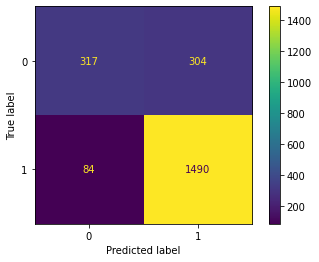

In [ ]:
### Step 1 - Select data
X=df[['MntMeatProducts', 'MntWines']]
y=df['Dependents_Target'].values


### Step 2 - Perform Min-Max scaling
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


### Step 3 - Configure model parameters 
from sklearn.semi_supervised import LabelSpreading # 
model_LS = LabelSpreading(kernel='rbf', # {'knn', 'rbf'} default='rbf'
                          gamma=70, # default=20, Parameter for rbf kernel.
                          #n_neighbors=7, # default=7, Parameter for knn kernel which is a strictly positive integer.
                          alpha=0.5, # Clamping factor. A value in (0, 1) that specifies the relative amount that an instance should adopt the information from its neighbors as opposed to its initial label. alpha=0 means keeping the initial label information; alpha=1 means replacing all initial information.
                          max_iter=100, # default=30, Maximum number of iterations allowed.
                          tol=0.001, # default=1e-3, Convergence tolerance: threshold to consider the system at steady state.
                          n_jobs=-1, # default=None, The number of parallel jobs to run. -1 means using all processors.
                         )

### Step 4 - Fit the model
LS=model_LS.fit(X_scaled, y)

### Step 5 - exclude observations with known records before evcaluating model performance
df_eval=df[['Dependents_Flag', 'Dependents_Target']].copy() # Copy dataframe with dependents info
df_eval['Predicted_label']=LS.transduction_ # Attach model predictions
df_eval=df_eval[df_eval['Dependents_Target']==-1] # Keep only records containing masked labels

### Step 6 - Print the summary of model results
print("Model Name: ", str(LS))
print("Classes: ", LS.classes_)
print("Label Distributions: ", LS.label_distributions_)
print("Transduction Label: ", LS.transduction_)
print("No. of features: ", LS.n_features_in_)
print("No. of iterations: ", LS.n_iter_)
print('')
print('*************** Evaluation of LS model ***************')
print(classification_report(df_eval['Dependents_Flag'], df_eval['Predicted_label']))
print('')
print('******************** Confusion Matrix ********************')
cm= confusion_matrix(df_eval['Dependents_Flag'], df_eval['Predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LS.classes_)
disp.plot()
plt.show()

As you can see, despite being very ambitious, we have achieved a pretty good result with a model accuracy of 82% (to make the assessment fair, we only used records with masked labels for model performance evaluation).

In [ ]:
# Create a scatter plot
fig = px.scatter(df, x='MntMeatProducts', y='MntWines', opacity=1, color=LS.transduction_.astype(str),
                 color_discrete_sequence=['yellow','green'],
                )

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white')

# Set figure title
fig.update_layout(title_text="Label Spreading model results")

# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()

We can see a clear separation of blue points (no dependents) and red points (with dependents) with a decision boundary located at around 400 spent on meat and ~1,000 spent on wine. So, according to this data, it looks like people without kids tend to eat more meat and drink more wine.

## Reference

https://towardsdatascience.com/how-to-benefit-from-the-semi-supervised-learning-with-label-spreading-algorithm-2f373ae5de96

https://towardsdatascience.com/semi-supervised-learning-how-to-assign-labels-with-label-propagation-algorithm-9f1683f4d0eb

https://towardsdatascience.com/self-training-classifier-how-to-make-any-algorithm-behave-like-a-semi-supervised-one-2958e7b54ab7